In [1]:
# estimate the ARCH(1) model

In [4]:
import pandas as pd
import yfinance as yf
from arch import arch_model

In [5]:
# specify the risky asset

In [6]:
RISKY_ASSET = 'GOOG'
START_DATE = '2015-01-01'
END_DATE = '2018-12-31'

In [7]:
# download data
df = yf.download(RISKY_ASSET, 
                start=START_DATE,
                end = END_DATE,
                adjusted = True)

[*********************100%***********************]  1 of 1 completed


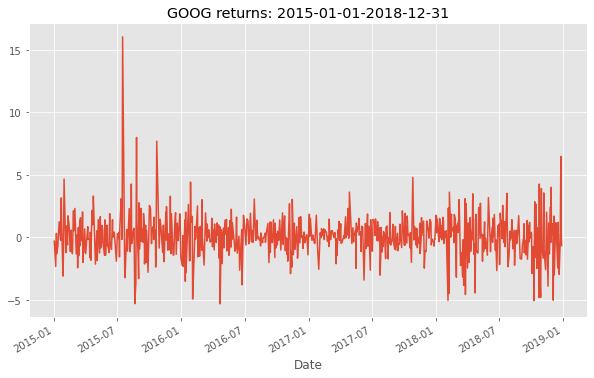

In [12]:
#calculate daily returns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
ax, fig = plt.subplots(figsize = (10, 6))
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'
returns.plot(title = f'{RISKY_ASSET} returns: {START_DATE}-{END_DATE}')
plt.show()

In [13]:
# specify the arch model
model = arch_model(returns, mean = 'Zero', vol = 'ARCH', p = 1, o = 0, q = 0)

In [14]:
# estimate the model and print the summary
model_fitted = model.fit(disp = 'off')
print(model_fitted.summary)

<bound method ARCHModelResult.summary of                         Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1800.60
Distribution:                  Normal   AIC:                           3605.19
Method:            Maximum Likelihood   BIC:                           3615.02
                                        No. Observations:                 1005
Date:                Wed, Sep 29 2021   Df Residuals:                     1005
Time:                        20:02:14   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.6323  

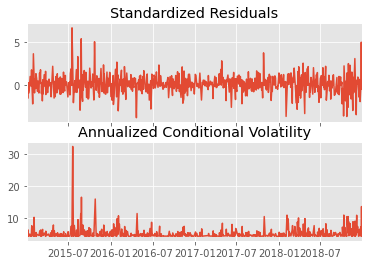

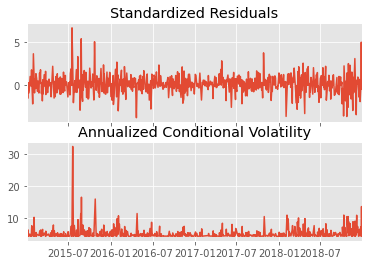

In [21]:
# plot the residuals and the conditional volatility
model_fitted.plot(annualize='M')